In [5]:
import numpy as np
import pandas as pd
import os

In [6]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [7]:
os.chdir('/content/gdrive/MyDrive/House Project Analysis 2023')
os.listdir()

['Cleaned_data_for_model.csv',
 'For_EDA_dataset.csv',
 'House_Price_dataset.csv',
 'Project House Price.ipynb']

In [8]:
price_df = pd.read_csv("House_Price_dataset.csv")
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168446 entries, 0 to 168445
Data columns (total 20 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   property_id    168446 non-null  int64  
 1   location_id    168446 non-null  int64  
 2   page_url       168446 non-null  object 
 3   property_type  168446 non-null  object 
 4   price          168446 non-null  int64  
 5   location       168446 non-null  object 
 6   city           168446 non-null  object 
 7   province_name  168446 non-null  object 
 8   latitude       168446 non-null  float64
 9   longitude      168446 non-null  float64
 10  baths          168446 non-null  int64  
 11  area           168446 non-null  object 
 12  purpose        168446 non-null  object 
 13  bedrooms       168446 non-null  int64  
 14  date_added     168446 non-null  object 
 15  agency         124375 non-null  object 
 16  agent          124374 non-null  object 
 17  Area Type      168446 non-nul

In [9]:
price_df.head()

,property_id,location_id,page_url,property_type,price,location,city,province_name,latitude,longitude,baths,area,purpose,bedrooms,date_added,agency,agent,Area Type,Area Size,Area Category
0,237062,3325,https://www.zameen.com/Property/g_10_g_10_2_gr...,Flat,10000000,G-10,Islamabad,Islamabad Capital,33.679890,73.012640,2,4 Marla,For Sale,2,02-04-2019,NaN,NaN,Marla,4.0,0-5 Marla
1,346905,3236,https://www.zameen.com/Property/e_11_2_service...,Flat,6900000,E-11,Islamabad,Islamabad Capital,33.700993,72.971492,3,5.6 Marla,For Sale,3,05-04-2019,NaN,NaN,Marla,5.6,5-10 Marla
2,386513,764,https://www.zameen.com/Property/islamabad_g_15...,House,16500000,G-15,Islamabad,Islamabad Capital,33.631486,72.926559,6,8 Marla,For Sale,5,07-17-2019,NaN,NaN,Marla,8.0,5-10 Marla
3,656161,340,https://www.zameen.com/Property/islamabad_bani...,House,43500000,Bani Gala,Islamabad,Islamabad Capital,33.707573,73.151199,4,2 Kanal,For Sale,4,04-05-2019,NaN,NaN,Kanal,2.0,1-5 Kanal
4,841645,3226,https://www.zameen.com/Property/dha_valley_dha...,House,7000000,DHA Defence,Islamabad,Islamabad Capital,33.492591,73.301339,3,8 Marla,For Sale,3,07-10-2019,Easy Property,Muhammad Junaid Ceo Muhammad Shahid Director,Marla,8.0,5-10 Marla


In [10]:
price_df_2 = price_df.dropna()

In [11]:
price_df_2.describe()

,property_id,location_id,price,latitude,longitude,baths,bedrooms,Area Size
count,1.243740e+05,124374.000000,1.243740e+05,124374.000000,124374.000000,124374.000000,124374.000000,124374.000000
mean,1.627201e+07,4353.955698,1.919263e+07,29.842276,71.246878,2.793285,3.146092,5.906584
std,1.628700e+06,3769.506096,3.750504e+07,3.792758,3.131293,2.568235,1.950180,5.931426
min,8.657500e+04,3.000000,0.000000e+00,24.749425,66.863657,0.000000,0.000000,0.000000
25%,1.601640e+07,1290.000000,2.000000e+05,24.951049,67.130733,0.000000,2.000000,3.000000
50%,1.691088e+07,3282.000000,9.205000e+06,31.457698,73.056182,3.000000,3.000000,5.000000
75%,1.714516e+07,7220.000000,2.100000e+07,33.558920,74.165909,4.000000,4.000000,8.400000
max,1.735772e+07,14220.000000,2.000000e+09,73.184088,74.564727,403.000000,68.000000,800.000000


In [12]:
price_df_2['purpose'].value_counts()

For Sale    89191
For Rent    35183
Name: purpose, dtype: int64

In [13]:
#The items for sale is more than the items for rent

In [14]:
price_df_2['province_name'].value_counts()

Punjab               51777
Sindh                44697
Islamabad Capital    27900
Name: province_name, dtype: int64

In [ ]:
# Punjab has more properties than Sindh and Islamabad Capital

In [15]:
price_df_2['property_type'].value_counts()

House            78487
Flat             28019
Upper Portion    10201
Lower Portion     6660
Farm House         502
Room               261
Penthouse          244
Name: property_type, dtype: int64

In [16]:
price_df_2.duplicated().sum()
# There is no duplicated data

0

In [17]:
property_by_province = price_df_2.groupby(['province_name', 'property_type'],as_index=False)['property_id'].count()
property_by_province

,province_name,property_type,property_id
0,Islamabad Capital,Farm House,163
1,Islamabad Capital,Flat,5376
2,Islamabad Capital,House,14892
3,Islamabad Capital,Lower Portion,3181
4,Islamabad Capital,Penthouse,28
5,Islamabad Capital,Room,116
6,Islamabad Capital,Upper Portion,4144
7,Punjab,Farm House,289
8,Punjab,Flat,3087
9,Punjab,House,44365


[Text(0, 0.5, 'Total count'), Text(0.5, 0, 'Property type')]

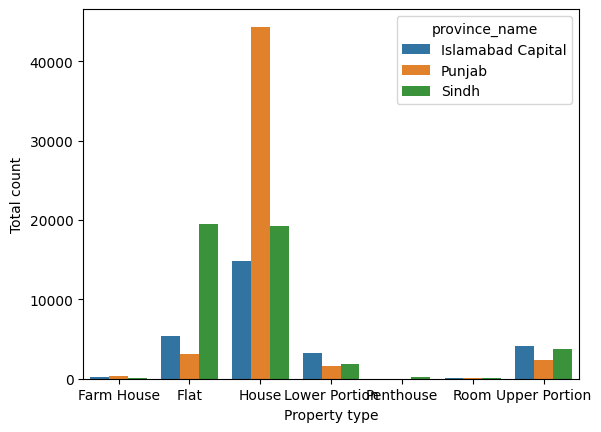

In [19]:
import seaborn as sns
df = sns.barplot(data = property_by_province, x = "property_type", y = "property_id", hue = "province_name")
df.set(ylabel = "Total count", xlabel = "Property type")

In [ ]:
# House is the most property in Punjab and Islamabad Capital while in Sindh, House and Flat has the same numbers

In [24]:
property_by_price = price_df_2.groupby(['province_name', 'property_type'],as_index=False)['price'].mean()
property_by_price

,province_name,property_type,price
0,Islamabad Capital,Farm House,7.823653e+07
1,Islamabad Capital,Flat,5.580657e+06
2,Islamabad Capital,House,2.458295e+07
3,Islamabad Capital,Lower Portion,5.763298e+04
4,Islamabad Capital,Penthouse,2.625339e+07
5,Islamabad Capital,Room,4.143621e+05
6,Islamabad Capital,Upper Portion,7.714648e+04
7,Punjab,Farm House,4.972379e+07
8,Punjab,Flat,5.669611e+06
9,Punjab,House,2.217145e+07


[Text(0, 0.5, 'price'), Text(0.5, 0, 'Property type')]

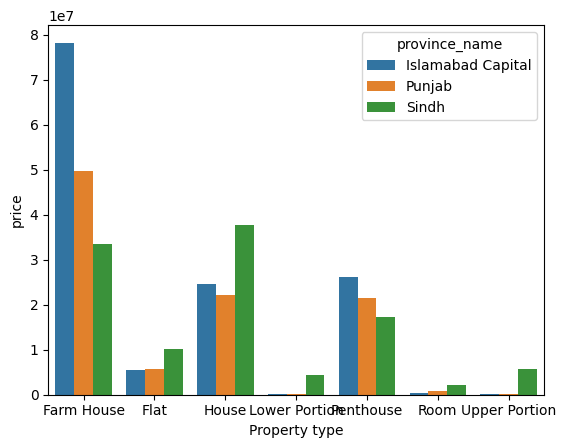

In [25]:
df_by_price = sns.barplot(data = property_by_price, x = "property_type", y = "price", hue = "province_name")
df_by_price.set(ylabel = "price", xlabel = "Property type")

In [ ]:
# The price for Farm House in Islamabad is the most expensive property.

In [27]:
price_by_area = price_df_2.groupby(['province_name', 'property_type', 'bedrooms'],as_index=False)['price'].mean()
price_by_area.sort_values('price', ascending=False)

,province_name,property_type,bedrooms,price
97,Punjab,House,25,9.600000e+08
96,Punjab,House,18,6.500000e+08
95,Punjab,House,16,3.500000e+08
90,Punjab,House,11,2.243839e+08
9,Islamabad Capital,Farm House,11,2.035000e+08
...,...,...,...,...
178,Sindh,Room,2,2.460000e+04
50,Islamabad Capital,Room,2,2.266667e+04
49,Islamabad Capital,Room,1,2.110784e+04
114,Punjab,Room,2,1.700000e+04


[Text(0, 0.5, 'price'), Text(0.5, 0, 'bedrooms')]

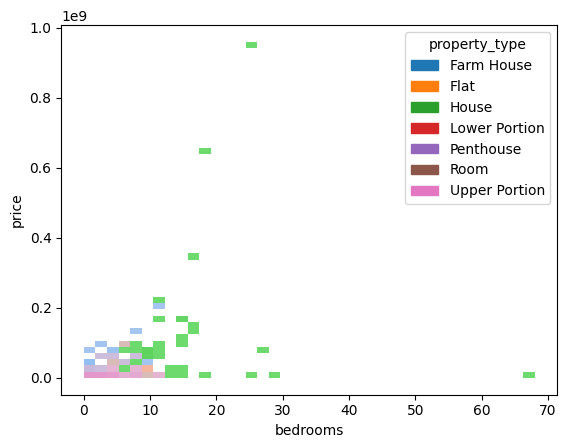

In [38]:
df_by_bedrooms = sns.histplot(data = price_by_area, x = "bedrooms", y = "price", hue = "property_type")
df_by_bedrooms.set(ylabel = "price", xlabel = "bedrooms")

In [ ]:
# The number of bedrooms effected the price of the property.